In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
bench_lignes = (pd.read_csv("data/raw/bench_lignes.csv")
                .astype({'ANALYSIS_DATE_FULL':'datetime64[ns]'})
                )
bench_lignes_EHY = (pd.read_csv("data/processed/bench_lignes_EHY.csv")
                    .astype({'ANALYSIS_DATE_FULL':'datetime64[ns]'})
                    )
caracteristiques_parts = (pd.read_csv("data/raw/caracteristiques_parts.csv")
                            .astype({'DATE_DAYS':'datetime64[ns]',
                                     'DATE_LIVE':'datetime64[ns]'})
                            )
fixing = (pd.read_csv("data/raw/fixing.csv")
            .astype({'PRICE_DATE':'datetime64[ns]'})
            .drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'])
            )
frais = (pd.read_csv("data/raw/frais.csv")
            .astype({'DATE_FRAIS':'datetime64[ns]'})
            )
historique_taux = (pd.read_csv("data/raw/historique_taux.csv")
                    .astype({'PRICE_DATE_FULL':'datetime64[ns]'})
                    )
passif = (pd.read_csv("data/raw/passif_annee_2_albert_school.csv")
            .astype({'Date':'datetime64[ns]'})  
            )
perf_bench = (pd.read_csv("data/raw/perf_bench.csv")
                .astype({'PERFORMANCE_START_DATE':'datetime64[ns]', 'ANALYSIS_DATE_FULL':'datetime64[ns]'})
                )
perf_fonds = (pd.read_csv("data/raw/perf_fonds.csv")
                .astype({'PERFORMANCE_START_DATE':'datetime64[ns]', 'ANALYSIS_DATE_FULL':'datetime64[ns]'})
                )
positions_eurohighyield = (pd.read_csv("data/raw/positions_eurohighyield.csv")
                            .astype({'INVENTORY_DATE':'datetime64[ns]'})
                            )
usgg10yr = (pd.read_csv('data/raw/usgg10yr_index.csv')
            .astype({'Quote Date':'datetime64[ns]'})
            )
passif_EHY = (pd.read_csv('data/processed/passif_EHY.csv')
                .astype({'Date':'datetime64[ns]'})
                )
caracteristiques_parts_EHY = (pd.read_csv('data/processed/caracteristiques_parts_EHY.csv')
                                .astype({'DATE_DAYS':'datetime64[ns]',
                                         'DATE_LIVE':'datetime64[ns]'})
                                )

C:\Users\maelm\AppData\Local\Temp\ipykernel_17392\1134636492.py:30: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  positions_eurohighyield = (pd.read_csv("data/raw/positions_eurohighyield.csv")


In [6]:
perf_bench = perf_bench[perf_bench['SECURITY_NAME'].isin([
    'EdR Fund Euro High Yield A - EUR',
    'EdR Fund Euro High Yield A - CHF',
    'EdR Fund Euro High Yield A - USD (H)',
    'EdR Fund Euro High Yield B - EUR',
    'EdR Fund Euro High Yield I - EUR',
    'EdR Fund Euro High Yield J - EUR',
    'EdR Fund Euro High Yield N - EUR',
    'EdR Fund Euro High Yield O - EUR',
    'EdR Fund Euro High Yield R - EUR'
])]
perf_fonds = perf_fonds[perf_fonds['SECURITY_NAME'].isin([
    'EdR Fund Euro High Yield A - EUR',
    'EdR Fund Euro High Yield A - CHF',
    'EdR Fund Euro High Yield A - USD (H)',
    'EdR Fund Euro High Yield B - EUR',
    'EdR Fund Euro High Yield I - EUR',
    'EdR Fund Euro High Yield J - EUR',
    'EdR Fund Euro High Yield N - EUR',
    'EdR Fund Euro High Yield O - EUR',
    'EdR Fund Euro High Yield R - EUR'
])]

C:\Users\maelm\AppData\Local\Temp\ipykernel_17392\3858800466.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_values['SECURITY_TYPE_NAME'] = positive_values['SECURITY_TYPE_NAME'].apply(lambda x: 'Autre' if x in small_categories else x)


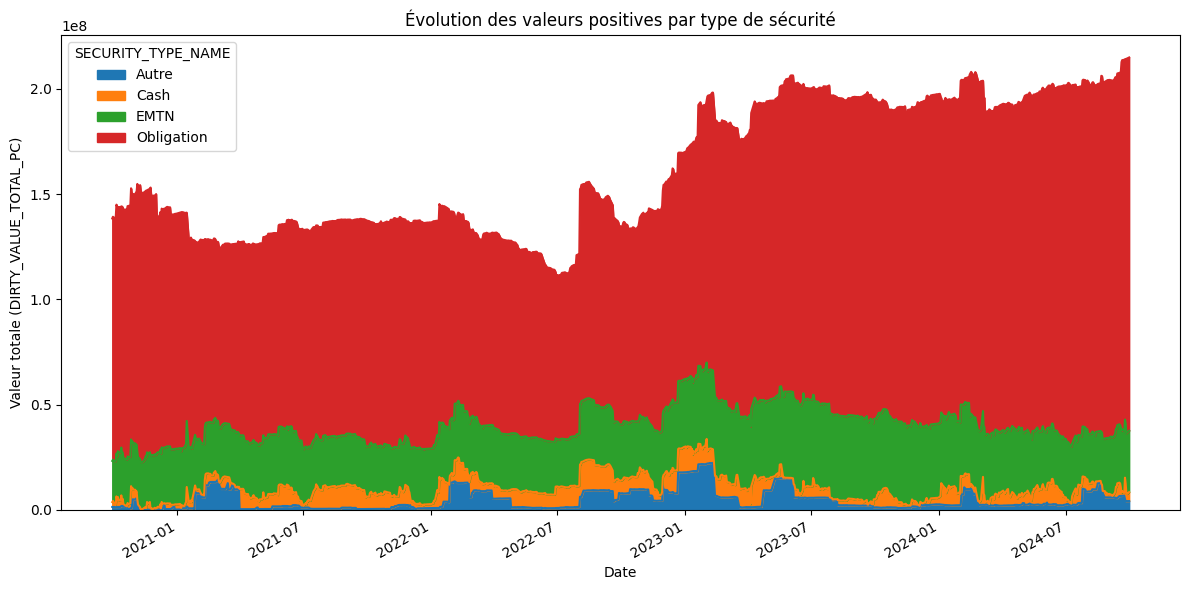

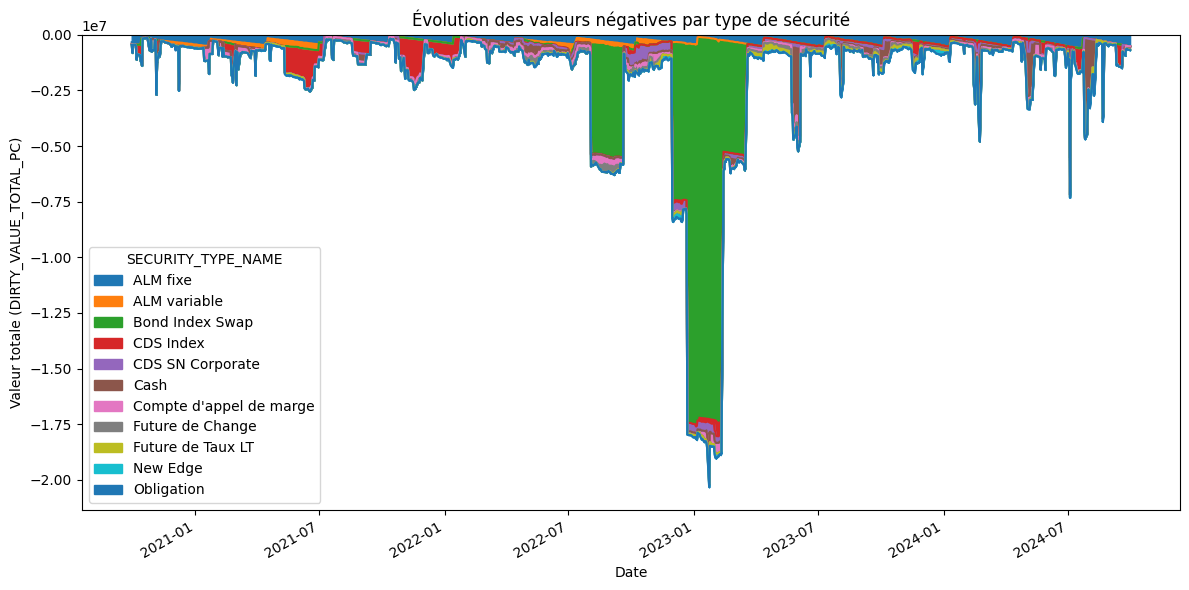

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que 'positions_eurohighyield' est déjà chargé
positions_eurohighyield['INVENTORY_DATE'] = pd.to_datetime(positions_eurohighyield['INVENTORY_DATE'])

# Calculer la valeur totale par type de sécurité
total_values = positions_eurohighyield.groupby('SECURITY_TYPE_NAME')['DIRTY_VALUE_TOTAL_PC'].sum()

# Définir un seuil pour regrouper les petites valeurs
threshold = total_values.quantile(0.90)  # Par exemple, regrouper les 10% les plus bas

# Identifier les types de sécurité à regrouper dans "Autre"
small_categories = total_values[total_values < threshold].index



# Séparer les valeurs positives et négatives
positive_values = positions_eurohighyield[positions_eurohighyield['DIRTY_VALUE_TOTAL_PC'] >= 0]
negative_values = positions_eurohighyield[positions_eurohighyield['DIRTY_VALUE_TOTAL_PC'] < 0]

# Remplacer les petites catégories par "Autre"
positive_values['SECURITY_TYPE_NAME'] = positive_values['SECURITY_TYPE_NAME'].apply(lambda x: 'Autre' if x in small_categories else x)

# Grouper et empiler les valeurs positives
evolution_fond_positive = positive_values.groupby(['INVENTORY_DATE', 'SECURITY_TYPE_NAME'])['DIRTY_VALUE_TOTAL_PC'].sum().unstack()
evolution_fond_positive.plot(kind='area', stacked=True, figsize=(12, 6), title='Évolution des valeurs positives par type de sécurité')

plt.ylabel('Valeur totale (DIRTY_VALUE_TOTAL_PC)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Grouper et empiler les valeurs négatives
evolution_fond_negative = negative_values.groupby(['INVENTORY_DATE', 'SECURITY_TYPE_NAME'])['DIRTY_VALUE_TOTAL_PC'].sum().unstack()
evolution_fond_negative.plot(kind='area', stacked=True, figsize=(12, 6), title='Évolution des valeurs négatives par type de sécurité')

plt.ylabel('Valeur totale (DIRTY_VALUE_TOTAL_PC)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [8]:
positive_values

,PORTFOLIO_IK,INVENTORY_FUND_NAME,INVENTORY_DATE,SECURITY_IK,SECURITY_ID,SECURITY_NAME,SECURITY_TYPE,SECURITY_TYPE_NAME,INSTRUMENT_TYPE,QUOTATION_CURRENCY,BALANCE_NOMINAL_OR_NUMBER,DIRTY_PRICE,DIRTY_VALUE_TOTAL_PC,DIRTY_VALUE_TOTAL_QC,DWH_EXPO_QC,DWH_EXPO_QC.1,MODEL_PORTFOLIO
0,2181,Edmond de Rothschild Fund Euro High Yield,2024-09-30,843773.0,BE6300371273,TNETBB 3 1/2 03/01/28,OBL,Obligation,Bond,EUR,300000.0,99.295337,297886.01,297886.01,297886.01,297886.01,TX_RDT_LID
1,2181,Edmond de Rothschild Fund Euro High Yield,2024-09-30,1062876.0,DE000A2YB7B5,SHAEFF 2 7/8 03/26/27,EMTN,EMTN,Bond,EUR,200000.0,100.073822,200147.64,200147.64,200147.64,200147.64,TX_RDT_LID
2,2181,Edmond de Rothschild Fund Euro High Yield,2024-09-30,1840102.0,DE000A3823R3,SHAEFF 4 1/2 08/14/26,EMTN,EMTN,Bond,EUR,300000.0,102.040369,306121.11,306121.11,306121.11,306121.11,TX_RDT_LID
3,2181,Edmond de Rothschild Fund Euro High Yield,2024-09-30,1840103.0,DE000A3823S1,SHAEFF 4 3/4 08/14/29,EMTN,EMTN,Bond,EUR,1100000.0,101.137973,1112517.70,1112517.70,1112517.70,1112517.70,TX_RDT_LID
4,2181,Edmond de Rothschild Fund Euro High Yield,2024-09-30,2002377.0,DE000A383HC1,SHAEFF 4 1/2 03/28/30,EMTN,EMTN,Bond,EUR,1000000.0,101.074385,1010743.85,1010743.85,1010743.85,1010743.85,TX_RDT_LID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317558,2181.0,Edmond de Rothschild Fund Euro High Yield,2020-09-30,1275609.0,XS2232027727,KGXGR 1 5/8 09/24/25,EMTN,EMTN,Bond,EUR,200000.0,100.436639,200873.28,200873.28,200873.28,200873.28,TX_RDT_LID
317559,2181.0,Edmond de Rothschild Fund Euro High Yield,2020-09-30,1274926.0,XS2232102876,SFRFP 4 1/8 01/15/29,OBL,Obligation,Bond,EUR,600000.0,100.198000,601188.00,601188.00,601188.00,601188.00,TX_RDT_LID
317560,2181.0,Edmond de Rothschild Fund Euro High Yield,2020-09-30,1275278.0,XS2232108568,MAXDIY 5 7/8 10/01/26,OBL,Obligation,Bond,EUR,1300000.0,100.292811,1303806.55,1303806.55,1303806.55,1303806.55,TX_RDT_LID
317561,2181.0,Edmond de Rothschild Fund Euro High Yield,2020-09-30,1279508.0,XS2239813301,CRTING 3 5/8 03/15/24,OBL,Obligation,Bond,EUR,900000.0,100.000000,900000.00,900000.00,900000.00,900000.00,TX_RDT_LID


C:\Users\maelm\AppData\Local\Temp\ipykernel_17392\2479641322.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positions_date['SECURITY_TYPE_NAME'] = positions_date['SECURITY_TYPE_NAME'].apply(lambda x: 'Autre' if x in small_categories else x)


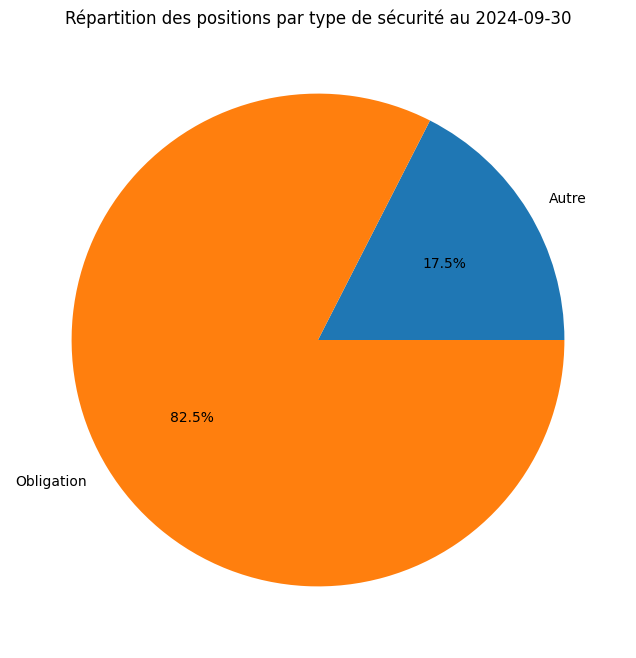

In [9]:

positions_eurohighyield['INVENTORY_DATE'] = pd.to_datetime(positions_eurohighyield['INVENTORY_DATE'])

# Définir une date spécifique
date = '2024-09-30'  # Exemple de date

# Filtrer les données pour la date spécifiée et exclure les valeurs négatives
positions_date = positions_eurohighyield[(positions_eurohighyield['INVENTORY_DATE'] == date) & (positions_eurohighyield['DIRTY_VALUE_TOTAL_PC'] >= 0)]

# Calculer la somme des valeurs par type de sécurité
positions_sum = positions_date.groupby('SECURITY_TYPE_NAME')['DIRTY_VALUE_TOTAL_PC'].sum()

# Définir un seuil pour regrouper les petites valeurs
threshold = positions_sum.quantile(0.90)  # Par exemple, regrouper les 10% les plus bas

# Identifier les types de sécurité à regrouper dans "Autre"
small_categories = positions_sum[positions_sum < threshold].index

# Remplacer les petites catégories par "Autre"
positions_date['SECURITY_TYPE_NAME'] = positions_date['SECURITY_TYPE_NAME'].apply(lambda x: 'Autre' if x in small_categories else x)

# Recalculer la somme des valeurs par type de sécurité après regroupement
positions_sum = positions_date.groupby('SECURITY_TYPE_NAME')['DIRTY_VALUE_TOTAL_PC'].sum()

# Créer le graphique en secteurs
positions_sum.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title(f"Répartition des positions par type de sécurité au {date}")
plt.ylabel('')
plt.show()

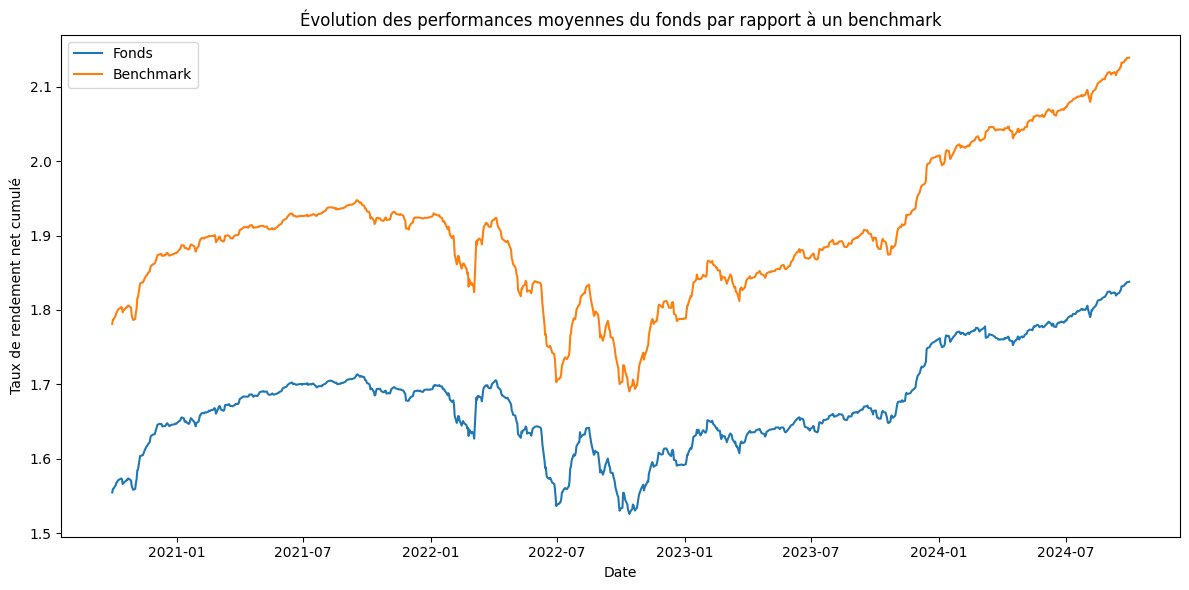

In [10]:
# Calculer la moyenne des performances par date pour le fonds et le benchmark
perf_fonds_mean = perf_fonds.groupby('ANALYSIS_DATE_FULL')['TWR_NET_CUMULATED'].mean()
perf_bench_mean = perf_bench.groupby('ANALYSIS_DATE_FULL')['TWR_NET_CUMULATED'].mean()

# Tracer les courbes moyennes
plt.figure(figsize=(12, 6))
plt.plot(perf_fonds_mean.index, perf_fonds_mean, label='Fonds')
plt.plot(perf_bench_mean.index, perf_bench_mean, label='Benchmark')
plt.title('Évolution des performances moyennes du fonds par rapport à un benchmark')
plt.ylabel('Taux de rendement net cumulé')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
segmentation_client = pd.read_csv('data/processed/segmentation_clients.csv')
segmentation_client
#segmentation_client.groupby('Date')['Net Inflows MTD (€)'].sum().plot(kind='line', color='skyblue')

,Segment_Type,Share Type,Currency,Profile,Business Country (Business Relationship) (Business Relationship),Net Inflows MTD (€),Net Inflows YTD (€),AUM (€)
0,Insurance,A,EUR,A - EUR,FRANCE,52339547,397294288,1.680008e+09
1,Bank,I,EUR,I - EUR,ITALY,10094360,105702770,2.728527e+08
2,Insurance,R,EUR,R - EUR,FRANCE,9632129,49992374,1.149125e+08
3,Bank,B,EUR,B - EUR,MONACO,4454955,3540786,1.278402e+08
4,AM company,I,EUR,I - EUR,WORLD,3692516,45036025,2.809321e+08
...,...,...,...,...,...,...,...,...
75,Bank,I,EUR,I - EUR,SPAIN,-3077379,-35471400,4.881918e+07
76,Bank,I,EUR,I - EUR,MONACO,-3162879,-6325758,6.141507e+06
77,Bank,J,EUR,J - EUR,MONACO,-3969594,-29840000,1.131300e+08
78,Bank,A,EUR,A - EUR,MONACO,-7264946,-109420614,3.405884e+09


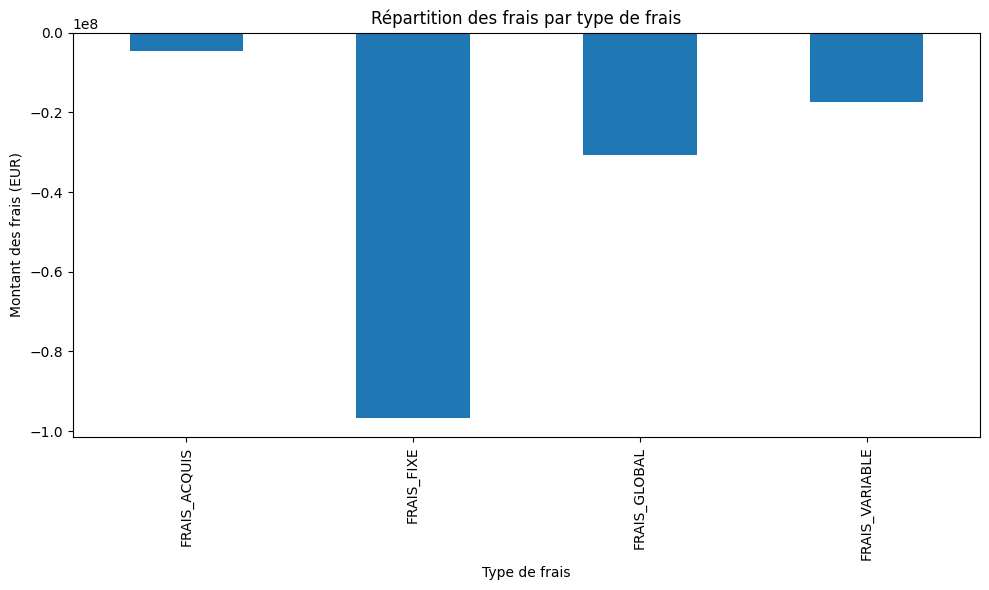

In [11]:
# Répartition des frais par type de frais
frais.groupby('TYPE_FRAIS')['MONTANT_FRAIS'].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Répartition des frais par type de frais')
plt.ylabel('Montant des frais (EUR)')
plt.xlabel('Type de frais')
plt.tight_layout()
plt.show()

In [12]:
perf_fonds.groupby('SECURITY_ISIN')['TWR_NET_CUMULATED'].mean()

SECURITY_ISIN
LU1160362742    1.802614
LU1160363047    1.432772
LU1160363476    1.341659
LU1160363633    2.522935
LU1160363989    1.439985
LU1160364102    1.578058
LU1160364441    1.795652
LU1160364797    1.665821
LU1218422209    1.178566
Name: TWR_NET_CUMULATED, dtype: float64

Taux de rendement total: -49.35%


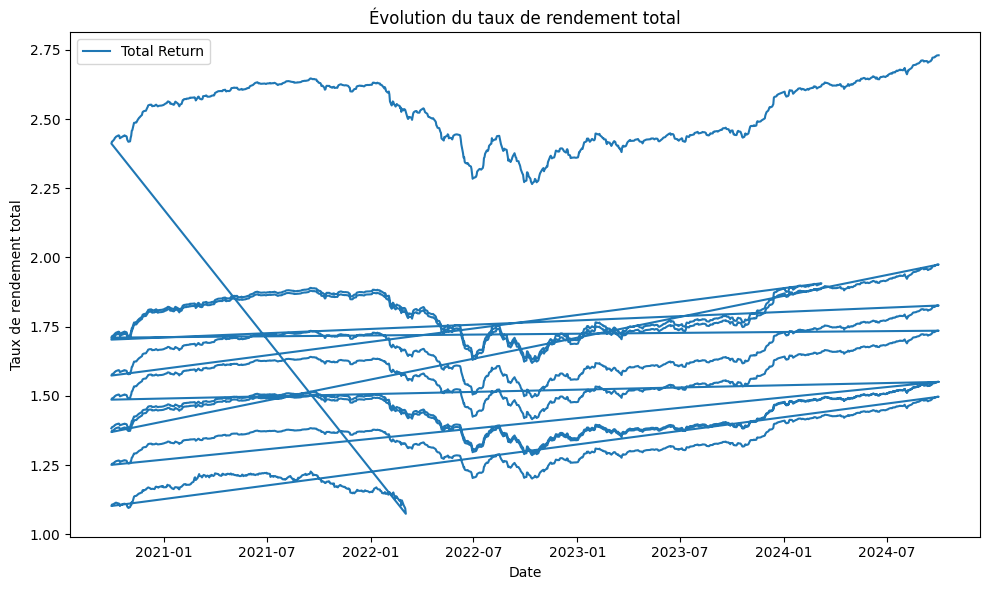

In [13]:
# Calcul du taux de rendement total
total_return = (perf_fonds['TWR_NET_CUMULATED'].iloc[-1] - perf_fonds['TWR_NET_CUMULATED'].iloc[0]) / perf_fonds['TWR_NET_CUMULATED'].iloc[0]
print(f"Taux de rendement total: {total_return:.2%}")

# Tracer le graphique du taux de rendement total
plt.figure(figsize=(10, 6))
plt.plot(perf_fonds['ANALYSIS_DATE_FULL'], perf_fonds['TWR_NET_CUMULATED'], label='Total Return')
plt.title('Évolution du taux de rendement total')
plt.xlabel('Date')
plt.ylabel('Taux de rendement total')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# Calcul de la volatilité annuelle
volatility = perf_fonds['TWR_NET_CUMULATED'].pct_change().std() * (252 ** 0.5)
print(f"Volatilité annuelle: {volatility:.2%}")

Volatilité annuelle: 15.49%


In [15]:
# Le ratio de Sharpe mesure le rendement ajusté au risque du fonds. Il est calculé en divisant le rendement excédentaire par la volatilité.

In [16]:
# Supposons un taux sans risque de 0.5%
risk_free_rate = 0.005

# Calcul du rendement annuel moyen
average_annual_return = perf_fonds['TWR_NET_CUMULATED'].pct_change().mean() * 252

# Calcul du ratio de Sharpe
sharpe_ratio = (average_annual_return - risk_free_rate) / volatility
print(f"Ratio de Sharpe: {sharpe_ratio:.2f}")

Ratio de Sharpe: -0.08


In [17]:
# Le drawdown maximum mesure la plus grande perte de valeur du fonds par rapport à un sommet précédent.
# Calcul du drawdown maximum
cumulative_returns = (1 + perf_fonds['TWR_NET_CUMULATED'].pct_change()).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = drawdown.min()
print(f"Drawdown maximum: {max_drawdown:.2%}")

Drawdown maximum: -60.65%


In [18]:
# Supposons que 'perf_bench' contient les données du benchmark
benchmark_return = (perf_bench['TWR_NET_CUMULATED'].iloc[0] - perf_bench['TWR_NET_CUMULATED'].iloc[-1]) / perf_bench['TWR_NET_CUMULATED'].iloc[0]
fund_return = (perf_fonds['TWR_NET_CUMULATED'].iloc[0] - perf_fonds['TWR_NET_CUMULATED'].iloc[-1]) / perf_fonds['TWR_NET_CUMULATED'].iloc[0]

print(f"Performance du fonds: {fund_return:.2%}")
print(f"Performance du benchmark: {benchmark_return:.2%}")

Performance du fonds: 49.35%
Performance du benchmark: 62.22%


In [19]:
segmentation = pd.read_csv('data/processed/segmentation_clients.csv')